In [1]:
import numpy as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

In [3]:
import sklearn.datasets
from sklearn.datasets import load_breast_cancer
bc =load_breast_cancer()

In [4]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
bc.target[300]

np.int64(0)

In [6]:
bc.target.shape

(569,)

In [7]:
bc.data.shape

(569, 30)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [9]:
print(f"Feature=> tarin: {X_train.shape}, test: {X_test.shape}")
print(f"Label=> tarin: {y_train.shape}, test: {y_test.shape}")

Feature=> tarin: (455, 30), test: (114, 30)
Label=> tarin: (455,), test: (114,)


In [10]:
X_train[0]

array([1.603e+01, 1.551e+01, 1.058e+02, 7.932e+02, 9.491e-02, 1.371e-01,
       1.204e-01, 7.041e-02, 1.782e-01, 5.976e-02, 3.371e-01, 7.476e-01,
       2.629e+00, 3.327e+01, 5.839e-03, 3.245e-02, 3.715e-02, 1.459e-02,
       1.467e-02, 3.121e-03, 1.876e+01, 2.198e+01, 1.243e+02, 1.070e+03,
       1.435e-01, 4.478e-01, 4.956e-01, 1.981e-01, 3.019e-01, 9.124e-02])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test) 

In [12]:
X_train[0]

array([0.42827394, 0.19614474, 0.4285122 , 0.27558855, 0.38169179,
       0.36108214, 0.28209934, 0.3499503 , 0.36464646, 0.2064027 ,
       0.08169473, 0.08561704, 0.08758711, 0.04867918, 0.1908683 ,
       0.22680025, 0.09381313, 0.2763781 , 0.073922  , 0.07514071,
       0.38527215, 0.26545842, 0.36799641, 0.21745969, 0.47764644,
       0.40798091, 0.39584665, 0.68075601, 0.28647476, 0.23658809])

In [13]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [14]:
X_train[0]

array([0.42827394, 0.19614474, 0.4285122 , 0.27558855, 0.38169179,
       0.36108214, 0.28209934, 0.3499503 , 0.36464646, 0.2064027 ,
       0.08169473, 0.08561704, 0.08758711, 0.04867918, 0.1908683 ,
       0.22680025, 0.09381313, 0.2763781 , 0.073922  , 0.07514071,
       0.38527215, 0.26545842, 0.36799641, 0.21745969, 0.47764644,
       0.40798091, 0.39584665, 0.68075601, 0.28647476, 0.23658809])

### Classification


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_predict=y_pred_test)
    
    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    print(f"acc train: {acc_train}, -  acc test: {acc_test}, - precision: {p}, - recall: {r}")

    
    return acc_train, acc_test, p, r

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

In [18]:
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calculate training accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    # Calculate test accuracy
    acc_test = accuracy_score(y_test, y_pred_test)
    # Precision and recall for test set (adjust as needed)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    return acc_train, acc_test, precision, recall


In [19]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)



In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [21]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
acc_test_knn, acc_train_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=128, min_samples_split=4, criterion='entropy')
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=128, min_samples_split=4)

In [23]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
acc_test_dt, acc_train_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8, criterion='entropy')
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
acc_test_rf, acc_train_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

In [25]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)
acc_test_svm, acc_train_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
acc_test_lr, acc_train_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

In [41]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=512, activation='tanh', solver='adam')
mlp.fit(X_train, y_train)
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)
acc_test_mlp, acc_train_mlp, p_mlp, r_mlp = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

c:\Users\Rudy\ML_test\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Comparison

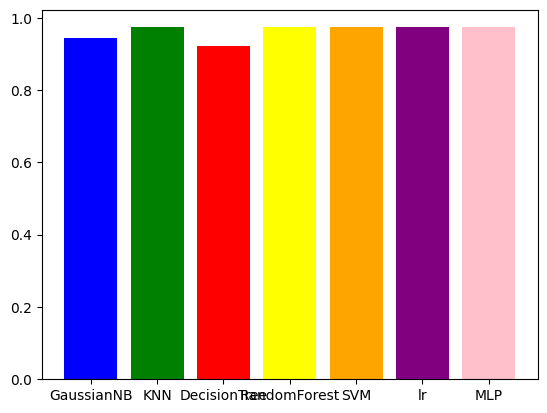

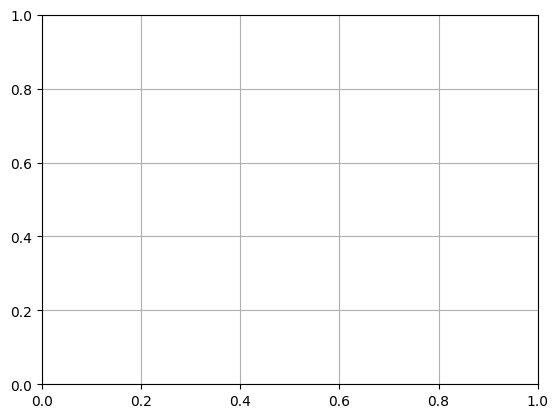

In [57]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_mlp]
title = ['GaussianNB', 'KNN', 'DecisionTree', 'RandomForest', 'SVM','lr', 'MLP']
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'pink']
plt.bar(title, acc_train, color=colors)
plt.show()
plt.grid()

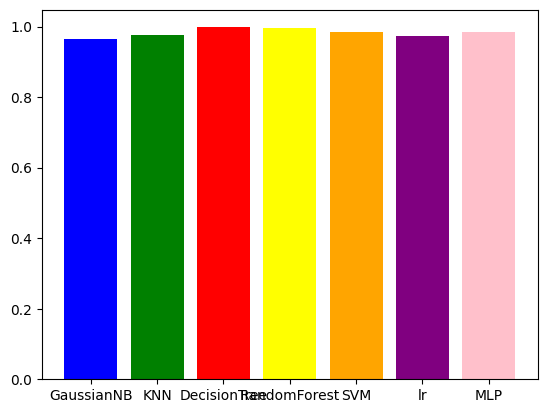

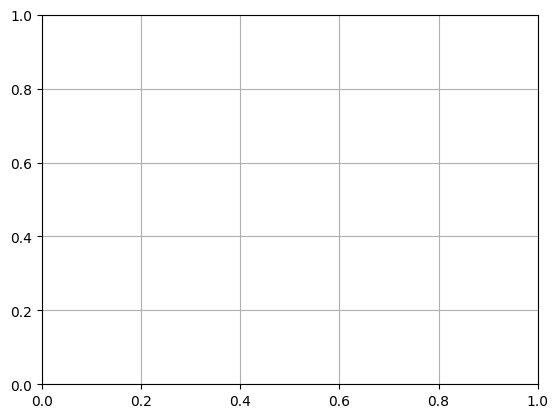

In [58]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_mlp]
title = ['GaussianNB', 'KNN', 'DecisionTree', 'RandomForest', 'SVM','lr', 'MLP']
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'pink']
plt.bar(title, acc_test, color=colors)
plt.show()
plt.grid()


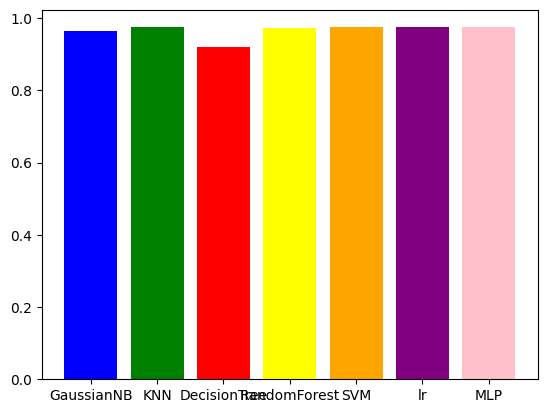

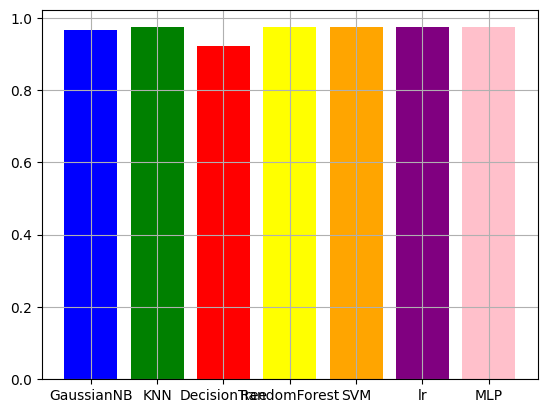

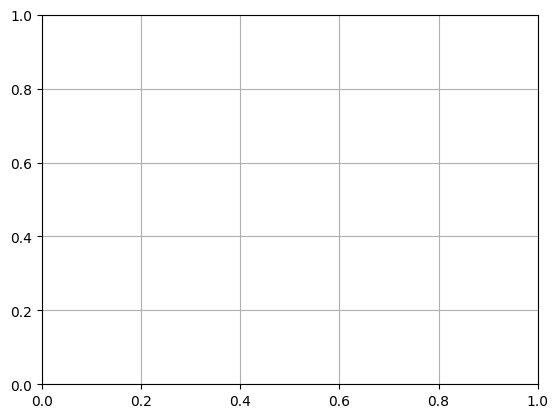

In [60]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_mlp]
title = ['GaussianNB', 'KNN', 'DecisionTree', 'RandomForest', 'SVM','lr', 'MLP']
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'pink']
plt.bar(title, p, color=colors)
plt.show()
plt.grid()

r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_mlp]
title = ['GaussianNB', 'KNN', 'DecisionTree', 'RandomForest', 'SVM','lr', 'MLP']
colors = ['blue', 'green', 'red', 'yellow', 'orange', 'purple', 'pink']
plt.bar(title, r, color=colors)
plt.show()
plt.grid()